#Credito

## Carregar base de Dados

In [1]:
# Importação dos pacotes
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns

# Seed para reprodução de resultados
seed = 1
random.seed(seed)
np.random.seed(seed)

In [2]:
data = pd.read_table('Datasets/credito.txt')
data.head()

,ESTC,NDEP,RENDA,TIPOR,VBEM,NPARC,VPARC,TEL,IDADE,RESMS,ENTRADA,CLASSE
0,1,0,360,0,313,9,52,0,25,48,0,1
1,0,0,350,1,468,10,65,0,33,6,0,1
2,0,0,1100,0,829,9,125,0,56,48,0,1
3,0,0,3000,0,552,12,76,1,31,60,0,1
4,1,0,1000,0,809,12,111,0,24,7,0,1


In [3]:
data.shape

(2077, 12)

In [4]:
data.describe()

,ESTC,NDEP,RENDA,TIPOR,VBEM,NPARC,VPARC,TEL,IDADE,RESMS,ENTRADA,CLASSE
count,2077.000000,2077.000000,2077.000000,2077.000000,2077.000000,2077.000000,2077.000000,2077.000000,2077.000000,2077.000000,2077.000000,2077.000000
mean,0.521907,0.122292,969.541647,0.447280,563.794415,8.395282,102.666346,0.128069,41.204622,30.901300,30.664420,0.474723
std,0.674420,0.556507,897.707359,0.497333,292.360830,3.614923,64.315987,0.334247,13.276082,51.960972,93.356164,0.499481
min,0.000000,0.000000,300.000000,0.000000,300.000000,1.000000,50.000000,0.000000,18.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,470.000000,0.000000,404.000000,6.000000,66.000000,0.000000,31.000000,6.000000,0.000000,0.000000
50%,0.000000,0.000000,640.000000,0.000000,489.000000,10.000000,83.000000,0.000000,39.000000,6.000000,0.000000,0.000000
75%,1.000000,0.000000,1150.000000,1.000000,618.000000,10.000000,118.000000,0.000000,52.000000,48.000000,0.000000,1.000000
max,3.000000,7.000000,9675.000000,1.000000,6000.000000,24.000000,719.000000,1.000000,70.000000,420.000000,1300.000000,1.000000


## Separar base em treino e teste

In [5]:
from sklearn.model_selection import train_test_split 
# Agora usaremos a função para fazer de fato a separação. Já faremos a separação em treino e teste e entrada e saída.
X = data.loc[:,data.columns != 'CLASSE']  # Entrada
y = data.CLASSE    # Saída
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    stratify=y)         # fazer amostragem estratificada. manter a proporção dos dados

In [6]:
y.value_counts()

0    1091
1     986
Name: CLASSE, dtype: int64

In [7]:
# Verificar proporção para teste para confirmar amostragem estratificada
print(0.2*y.value_counts()[0])
print(0.2*y.value_counts()[1])

218.20000000000002
197.20000000000002


In [8]:
y_test.value_counts()

0    219
1    197
Name: CLASSE, dtype: int64

In [9]:
y_train.value_counts()

0    872
1    789
Name: CLASSE, dtype: int64

In [10]:
# Vamos olhar os shapes da bases de treino e teste
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1661, 11)
(416, 11)
(1661,)
(416,)


##Machine Learning

In [19]:
# treinar modelo
from sklearn.tree import DecisionTreeClassifier

def train(X_train, y_train, seed):
  model = DecisionTreeClassifier(random_state=seed,
                                  max_depth=15,
                                  min_samples_leaf=3) # tente mudar parâmetro para evitar overfitting
  model.fit(X_train, y_train);
  return model

model = train(X_train, y_train, seed)

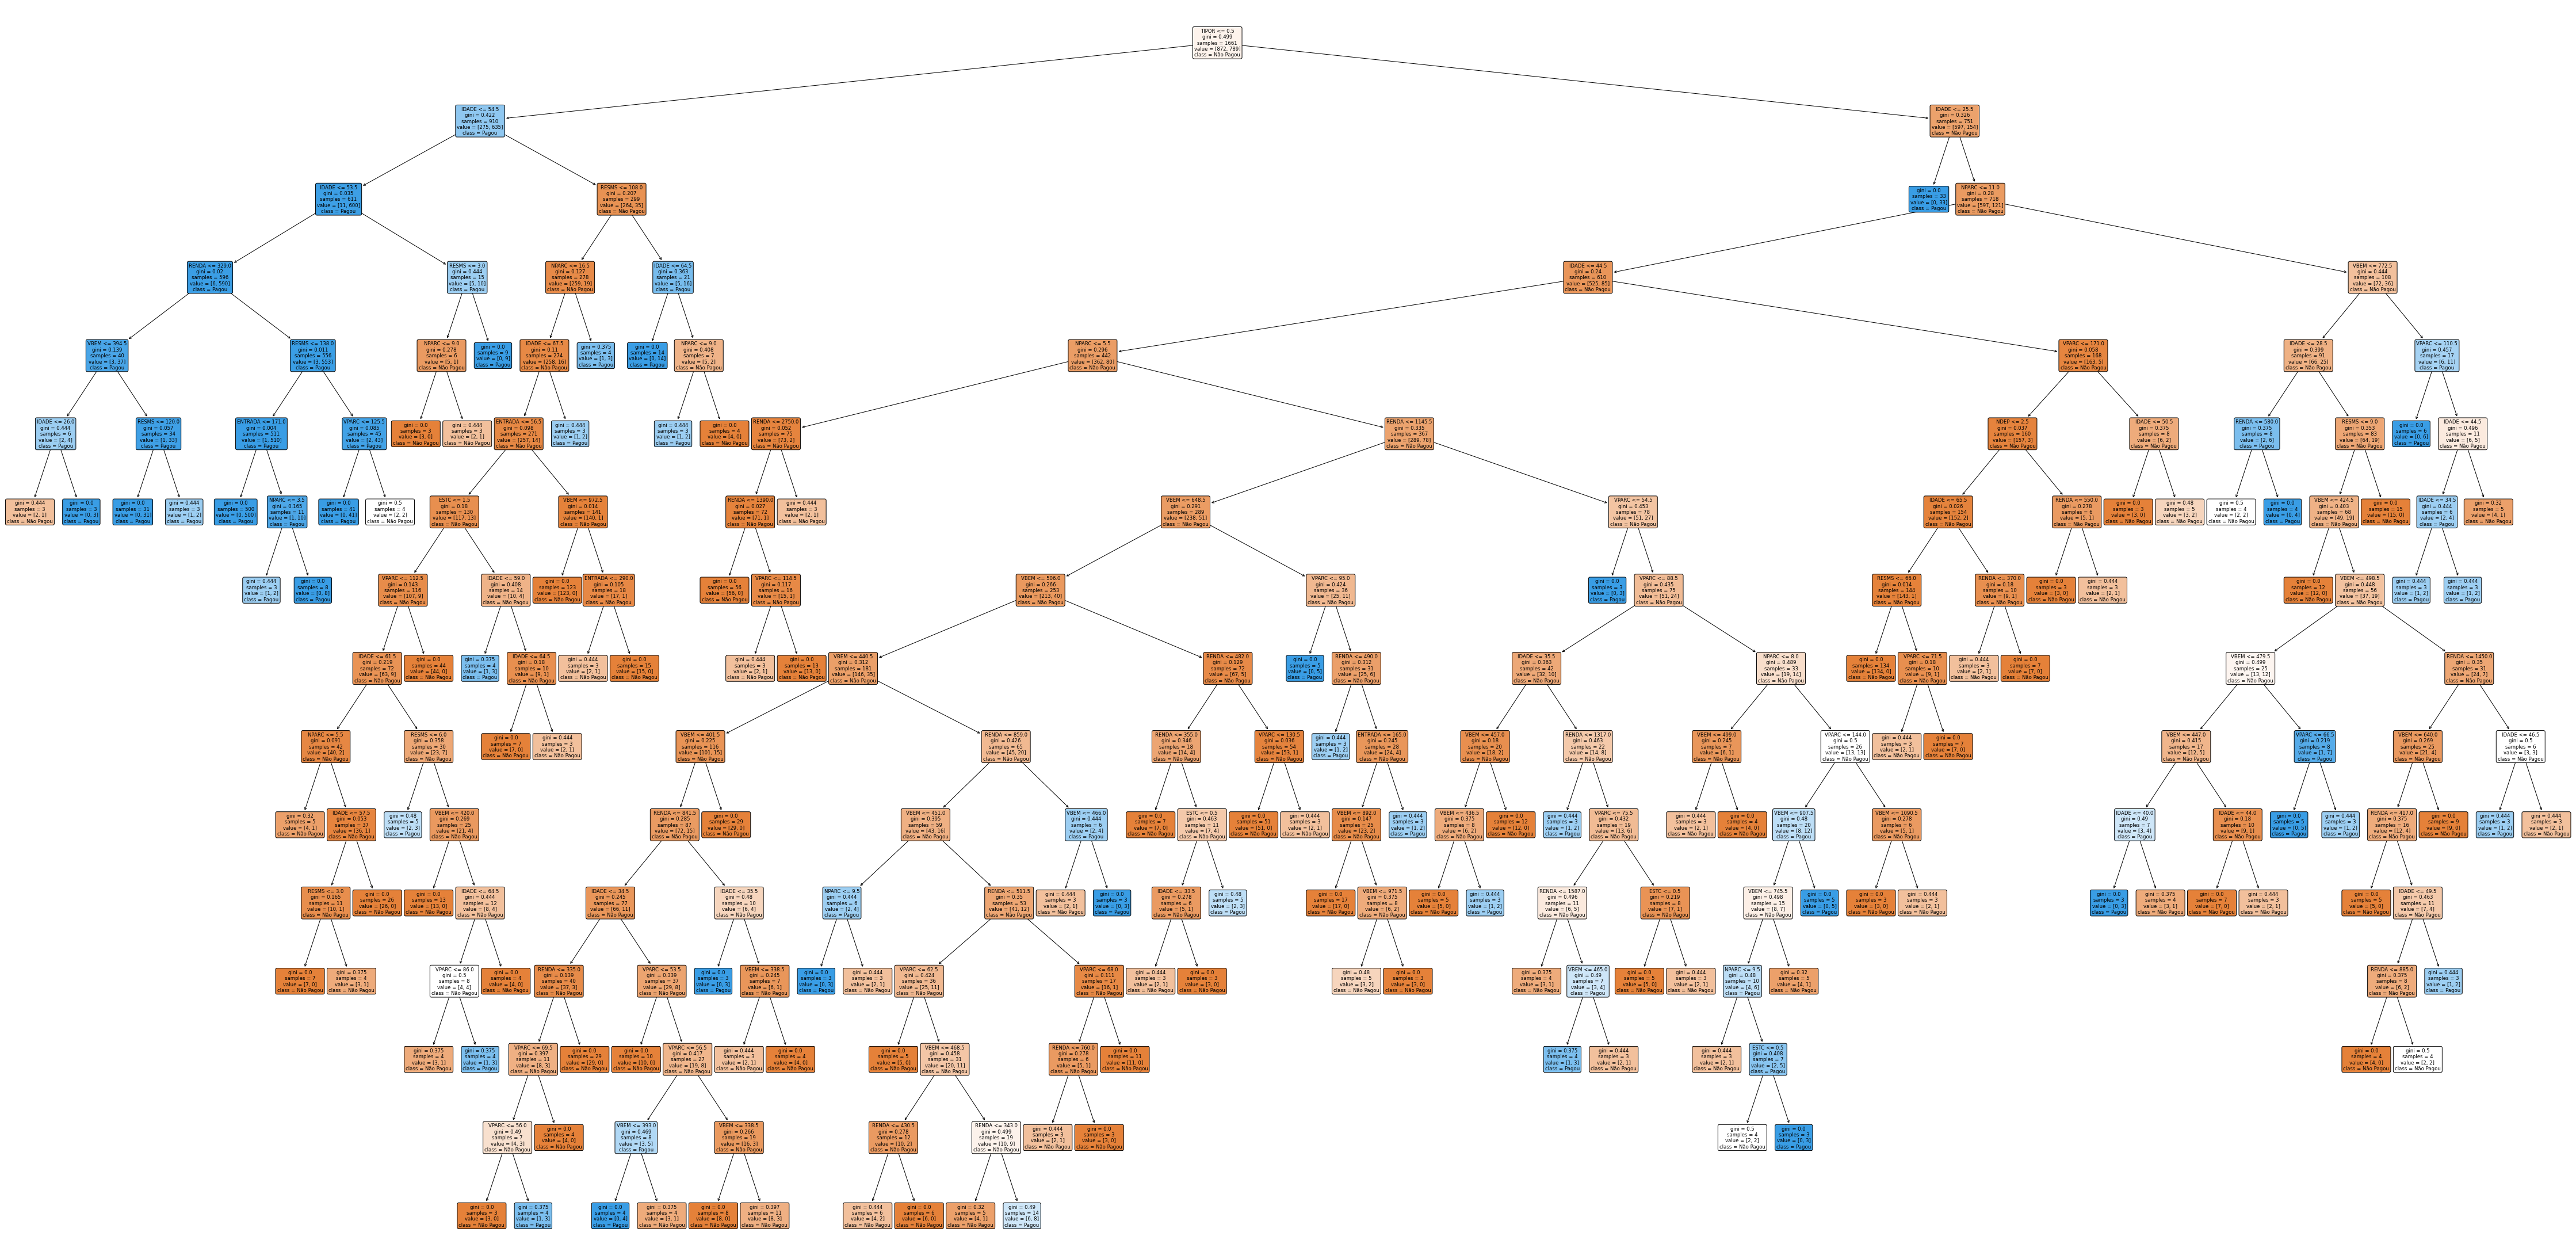

In [20]:
# Visualização gráfica da árvore de decisão
from sklearn.tree import plot_tree
plt.subplots(figsize=(80, 40)) # Definir tamanho da imagem a ser gerada
plot_tree(model, class_names=['Não Pagou', 'Pagou'], feature_names=data.columns,
               filled=True, rounded=True); # plota a árvore

plt.savefig('tree.png') # Salva a imagem

In [21]:
# profundidade da árvore
model.get_depth()

15

### Avaliar modelo treinado na base de teste

Resultados de Treino
Acurácia:  0.9542444310656231
Kappa:  0.9081489803224201
F1:  0.9512195121951219


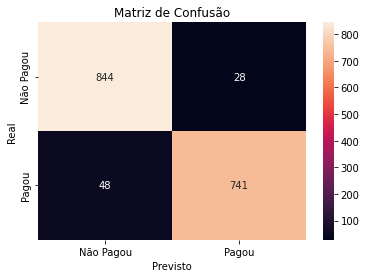

Resultados de Teste
Acurácia:  0.8677884615384616
Kappa:  0.7349029058719934
F1:  0.860759493670886


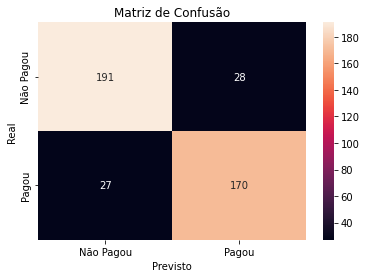

In [22]:
def predict_and_evaluate(model, X_test, y_test):

  # inferência do teste
  y_pred = model.predict(X_test) 

  # Acurácia
  from sklearn.metrics import accuracy_score
  accuracy = accuracy_score(y_test, y_pred)
  print('Acurácia: ', accuracy)

  # Kappa
  from sklearn.metrics import cohen_kappa_score
  kappa = cohen_kappa_score(y_test, y_pred)
  print('Kappa: ', kappa)

  # F1
  from sklearn.metrics import f1_score
  f1 = f1_score(y_test, y_pred)
  print('F1: ', f1)

  # Matriz de confusão
  from sklearn.metrics import confusion_matrix
  confMatrix = confusion_matrix(y_test, y_pred)

  ax = plt.subplot()
  sns.heatmap(confMatrix, annot=True, fmt=".0f")
  plt.xlabel('Previsto')
  plt.ylabel('Real')
  plt.title('Matriz de Confusão')

  # Colocar os nomes
  ax.xaxis.set_ticklabels(['Não Pagou', 'Pagou']) 
  ax.yaxis.set_ticklabels(['Não Pagou', 'Pagou'])
  plt.show()

print('Resultados de Treino')
predict_and_evaluate(model, X_train, y_train)
print('Resultados de Teste')
predict_and_evaluate(model, X_test, y_test)

###Normalizar

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Resultados de Treino
Acurácia:  0.9542444310656231
Kappa:  0.9081489803224201
F1:  0.9512195121951219


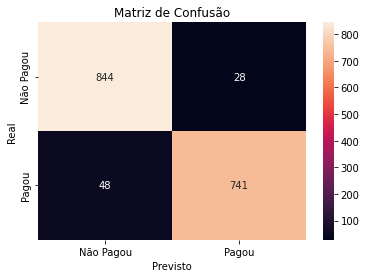

Resultados de Teste
Acurácia:  0.8677884615384616
Kappa:  0.7349029058719934
F1:  0.860759493670886


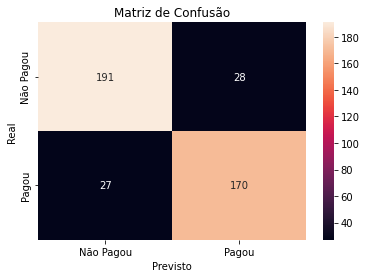

In [24]:
# Treinar e Testar novamente
model = train(X_train, y_train, seed)
print('Resultados de Treino')
predict_and_evaluate(model, X_train, y_train)
print('Resultados de Teste')
predict_and_evaluate(model, X_test, y_test)

##Grid Search

In [25]:
from sklearn.model_selection import GridSearchCV

# Definir parâmetros a serem utilizados
tuned_parameters = [{'criterion': ['gini', 'entropy'], 'max_depth': [2,4,5,6,8,10,12],
                     'min_samples_leaf': [1, 2, 3, 4, 5, 8, 10]}]

# Executar o grid search
model = GridSearchCV(DecisionTreeClassifier(), tuned_parameters, scoring='f1')
model.fit(X_train, y_train);

In [26]:
model.best_params_

{'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 8}

Resultados de Treino
Acurácia:  0.909692956050572
Kappa:  0.8176579419608486
F1:  0.8974008207934335


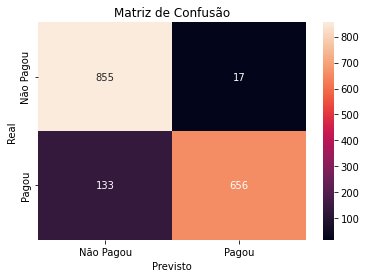

Resultados de Teste
Acurácia:  0.9038461538461539
Kappa:  0.8057663125948407
F1:  0.8907103825136613


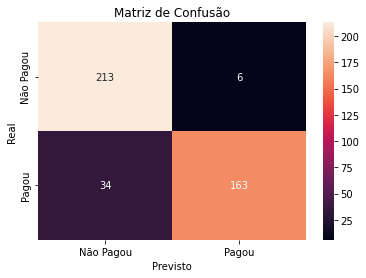

In [27]:
print('Resultados de Treino')
predict_and_evaluate(model, X_train, y_train)
print('Resultados de Teste')
predict_and_evaluate(model, X_test, y_test)

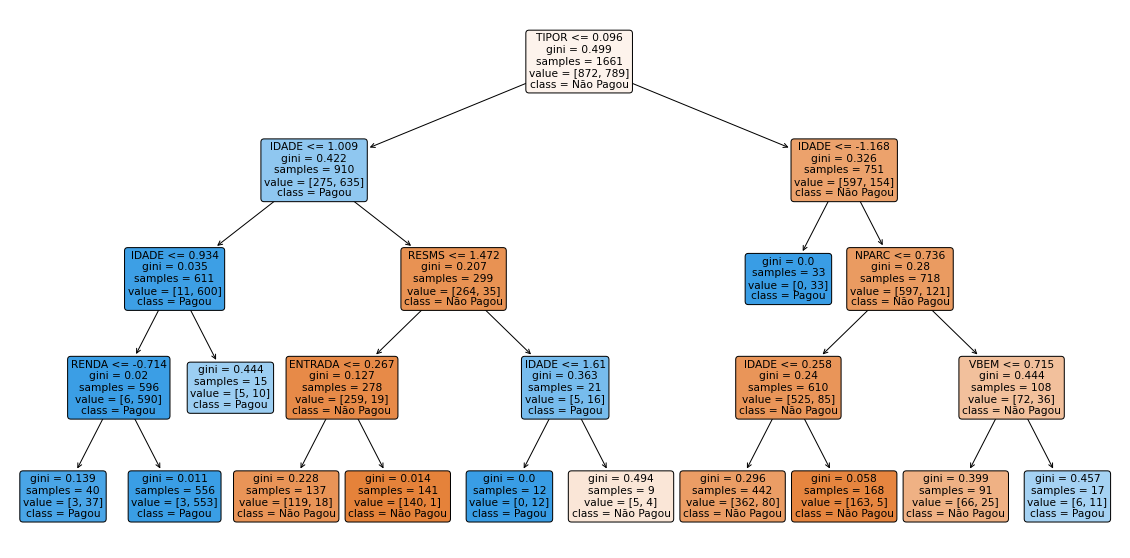

In [28]:
# Visualização gráfica da árvore de decisão
plt.subplots(figsize=(20, 10)) # Definir tamanho da imagem a ser gerada
plot_tree(model.best_estimator_, class_names=['Não Pagou', 'Pagou'], 
               filled=True, rounded=True, feature_names=data.columns);

plt.savefig('tree_final.png') # Salva a imagem

# Inferir novos dados com modelo treinado!

In [29]:
# 1. Carreguei os dados sem o rótulo
new_data = pd.read_table('Datasets/credito_sem_rotulo.txt')
new_data.head(8)

,ESTC,NDEP,RENDA,TIPOR,VBEM,NPARC,VPARC,TEL,IDADE,RESMS,ENTRADA
0,1,0,400,0,399,6,89,0,19,24,0
1,1,0,650,1,480,10,67,0,21,6,0
2,2,0,600,1,544,3,149,1,49,12,149
3,1,0,360,0,313,9,52,0,25,48,0
4,0,0,350,1,468,10,65,0,33,6,0
5,0,0,1100,0,829,9,125,0,56,48,0
6,0,0,3000,0,552,12,76,1,31,60,0
7,1,0,1000,0,809,12,111,0,24,7,0


In [30]:
# 2. Aplicar os pré processamentos feitos no treino
new_data_normalized = scaler.transform(new_data)

In [31]:
# 3. Faço as inferências
inferences = model.predict(new_data_normalized)

In [32]:
# 4. Visualizar inferências juntamente com a base original
new_data['previsões'] = inferences
new_data.head(8)

,ESTC,NDEP,RENDA,TIPOR,VBEM,NPARC,VPARC,TEL,IDADE,RESMS,ENTRADA,previsões
0,1,0,400,0,399,6,89,0,19,24,0,1
1,1,0,650,1,480,10,67,0,21,6,0,1
2,2,0,600,1,544,3,149,1,49,12,149,0
3,1,0,360,0,313,9,52,0,25,48,0,1
4,0,0,350,1,468,10,65,0,33,6,0,0
5,0,0,1100,0,829,9,125,0,56,48,0,0
6,0,0,3000,0,552,12,76,1,31,60,0,1
7,1,0,1000,0,809,12,111,0,24,7,0,1


In [37]:
# criando colunas de propabilidade da decisão do modelo

new_data['prob0'] = model.predict_proba(new_data_normalized)[:,0]
new_data['prob1'] = model.predict_proba(new_data_normalized)[:,1]

In [38]:
new_data.head(8)

,ESTC,NDEP,RENDA,TIPOR,VBEM,NPARC,VPARC,TEL,IDADE,RESMS,ENTRADA,previsões,prob0,prob1
0,1,0,400,0,399,6,89,0,19,24,0,1,0.005396,0.994604
1,1,0,650,1,480,10,67,0,21,6,0,1,0.000000,1.000000
2,2,0,600,1,544,3,149,1,49,12,149,0,0.970238,0.029762
3,1,0,360,0,313,9,52,0,25,48,0,1,0.005396,0.994604
4,0,0,350,1,468,10,65,0,33,6,0,0,0.819005,0.180995
5,0,0,1100,0,829,9,125,0,56,48,0,0,0.868613,0.131387
6,0,0,3000,0,552,12,76,1,31,60,0,1,0.005396,0.994604
7,1,0,1000,0,809,12,111,0,24,7,0,1,0.005396,0.994604
